In [2]:
import numpy as np
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
from roughSeg.utils import k_fold_split_train_val_test, getFiles

import ipywidgets as widgets
from ipywidgets import interact

output_dir = "/data/FLARE21/results/full_runs/yolo_transpose_plusplus/"
mask_dir = "/data/FLARE21/training_data/TrainingMask/"
image_dir = "/data/FLARE21/training_data/TrainingImg/"
#res = np.squeeze(np.load(os.path.join(output_dir, "full_res_results_grid.npy")))

In [19]:
source_dir = "/data/FLARE21/training_data_256/"
imagedir = os.path.join(source_dir, "scaled_ims/")
dataset_size = len(sorted(getFiles(imagedir)))
_, _, test_inds = k_fold_split_train_val_test(dataset_size, fold_num=1, seed=230597)
all_fnames = sorted(getFiles(imagedir))
test_im_fnames = [all_fnames[ind] for ind in test_inds]

In [20]:
bad_segs = np.squeeze(np.argwhere(res[:,0,0] < 0.9))

In [22]:
bad_fnames = [test_im_fnames[bad_segs[bdx]] for bdx in range(len(bad_segs))]
print(bad_fnames)

['train_301.npy', 'train_360.npy', 'train_314.npy', 'train_281.npy', 'train_338.npy', 'train_309.npy', 'train_307.npy', 'train_302.npy', 'train_315.npy', 'train_298.npy', 'train_287.npy']


In [ ]:
bdx = 1
test_fname = test_im_fnames[bad_segs[bdx]]
pred = np.load(os.path.join(output_dir, "full_res_test_segs/", 'pred_' + test_fname))
sitk_mask = sitk.ReadImage(os.path.join(mask_dir, test_fname.replace('.npy','.nii.gz')))
gold_mask = sitk.GetArrayFromImage(sitk_mask).astype(int)
if sitk_mask.GetDirection()[-1] == -1:
    gold_mask = np.flip(gold_mask, axis=0).copy()
    gold_mask = np.flip(gold_mask, axis=2).copy() 
print(test_fname, res[bad_segs[bdx],:,0])

In [ ]:
plt.figure()
plt.imshow(np.rot90(pred[:,220],2), vmin=0, vmax=4, cmap='jet')
plt.figure()
plt.imshow(np.rot90(gold_mask[:,220],2), vmin=0, vmax=4, cmap='jet')
plt.show()

In [ ]:
def dice(a, b):
    a = a.reshape(-1)
    b = b.reshape(-1)
    return (2. * (a*b).sum()) / (a.sum() + b.sum())
g = (gold_mask==1).astype(int)
p = (pred==1).astype(int)
print(dice(g,p))

In [11]:
# Print iterations progress
def printProgressBar(iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [16]:
fnames = sorted(getFiles(image_dir))
directions = []
printProgressBar(0, len(fnames), prefix = 'Progress:', suffix = 'Complete', length = 50)
for f, fname in enumerate(fnames):
    directions.append(sitk.ReadImage(os.path.join(image_dir, fname)).GetDirection())
    printProgressBar(f +1, len(fnames), prefix = 'Progress:', suffix = 'Complete', length = 50)

imd = np.array(directions)
unique = [imd[0]]
for i in range(1,361):
    u = True
    for j in range(len(unique)):
        if (imd[i] == unique[j]).all():
            u = False
            continue
    if u:
        unique.append(imd[i])

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [17]:
fnames = sorted(getFiles(mask_dir))
directions = []
printProgressBar(0, len(fnames), prefix = 'Progress:', suffix = 'Complete', length = 50)
for f, fname in enumerate(fnames):
    directions.append(sitk.ReadImage(os.path.join(mask_dir, fname)).GetDirection())
    printProgressBar(f +1, len(fnames), prefix = 'Progress:', suffix = 'Complete', length = 50)

md = np.array(directions)
unique = [md[0]]
for i in range(1,361):
    u = True
    for j in range(len(unique)):
        if (md[i] == unique[j]).all():
            u = False
            continue
    if u:
        unique.append(md[i])

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [37]:
print(md[280])
image280 = sitk.ReadImage(os.path.join(image_dir, "train_280_0000.nii.gz"))
print(image280.GetDirection())
print(md[281])
image281 = sitk.ReadImage(os.path.join(image_dir, "train_281_0000.nii.gz"))
print(image281.GetDirection())

[-1.  0.  0.  0. -1.  0.  0.  0.  1.]
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
[ 1.  0.  0.  0. -1.  0.  0.  0. -1.]
(1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0)


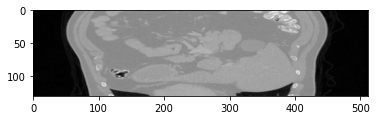

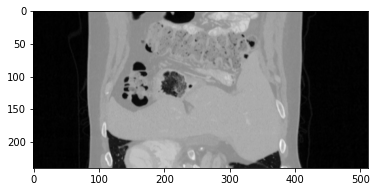

In [43]:
im280 = sitk.GetArrayFromImage(image280)
im281 = sitk.GetArrayFromImage(image281)
im281 = np.flip(im281, axis=0)
im281 = np.flip(im281, axis=2)
plt.figure()
plt.imshow(im280[:,300],cmap='Greys_r')
plt.figure()
plt.imshow(im281[:,300],cmap='Greys_r')

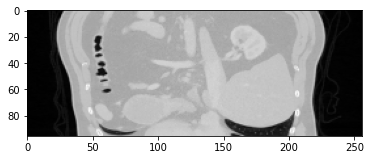

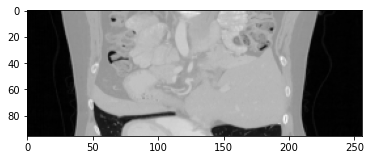

In [46]:
source_dir = "/data/FLARE21/training_data_256/"

im280 = np.load(os.path.join(source_dir, "scaled_ims/", "train_280.npy"))
im281 = np.load(os.path.join(source_dir, "scaled_ims/", "train_281.npy"))
plt.figure()
plt.imshow(im280[:,128],cmap='Greys_r')
plt.figure()
plt.imshow(im281[:,128],cmap='Greys_r')


In [28]:
input_dir = "/data/FLARE21/results/full_runs/tiny_segmenter_192_donalOutputs/masks/"
input_test_dir = "/data/FLARE21/results/full_runs/tiny_segmenter_192_donalOutputs/masks/mask_test"
pred_fnames = sorted(getFiles(input_dir))
@interact
def check_preds(fname=list(pred_fnames), slice=list(np.arange(1, 80, 1))):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    sitk_img = sitk.ReadImage(os.path.join(
        image_dir, fname.replace('.npy', '_0000.nii.gz')))
    img = sitk.GetArrayFromImage(sitk_img).astype(int)
    add_res = np.load(os.path.join("/data/FLARE21/results/",
                                   "full_runs/tiny_segmenter_192_donalOutputs", "full_res_results_grid.npy"))[0]
    print(add_res.shape)
    idx = pred_fnames.index(fname)
    print(add_res[idx])
    pred = np.load(os.path.join(input_dir, fname))
    ax[0].imshow(pred[slice], vmin=0, vmax=5, cmap="jet")
    
    #--- GT --
    # sitk_mask = sitk.ReadImage(os.path.join(
    #     mask_dir, fname.replace('.npy', '.nii.gz')))
    # gold_mask = sitk.GetArrayFromImage(sitk_mask).astype(int)
    ax[1].imshow(img[slice], cmap='gray')
    test_pred = np.load(os.path.join(input_test_dir, fname))
    ax[1].imshow(np.where(gold_mask[slice]==0.0, np.nan, gold_mask[slice]), alpha=0.5)
    #plt.show()


interactive(children=(Dropdown(description='fname', options=('train_000.npy', 'train_006.npy', 'train_022.npy'…